https://www.kaggle.com/datasets/andrewmvd/okcupid-profiles


In [1]:
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
profile = pd.read_csv("okcupid_profiles.csv")

In [3]:
profile.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')

In [4]:
# 속성이 너무 많아서 정리함
profile_short = profile[['age', 'status', 'sex', 'height', 'education', 'body_type', 'orientation']]
profile_short

,age,status,sex,height,education,body_type,orientation
0,22,single,m,75.0,working on college/university,a little extra,straight
1,35,single,m,70.0,working on space camp,average,straight
2,38,available,m,68.0,graduated from masters program,thin,straight
3,23,single,m,71.0,working on college/university,thin,straight
4,29,single,m,66.0,graduated from college/university,athletic,straight
...,...,...,...,...,...,...,...
59941,59,single,f,62.0,graduated from college/university,NaN,straight
59942,24,single,m,72.0,working on college/university,fit,straight
59943,42,single,m,71.0,graduated from masters program,average,straight
59944,27,single,m,73.0,working on college/university,athletic,straight


In [5]:
profile_short = profile_short.dropna()

In [6]:
profile_short.status.unique()

array(['single', 'available', 'seeing someone', 'married', 'unknown'],
      dtype=object)

In [7]:
profile_short.sex.unique()

array(['m', 'f'], dtype=object)

In [8]:
profile_short.education.unique()

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       'graduated from high school', 'working on masters program',
       'graduated from space camp', 'college/university',
       'dropped out of space camp', 'graduated from ph.d program',
       'graduated from law school', 'working on ph.d program',
       'two-year college', 'graduated from two-year college',
       'working on med school', 'dropped out of college/university',
       'space camp', 'graduated from med school',
       'dropped out of high school', 'working on high school',
       'masters program', 'dropped out of ph.d program',
       'dropped out of two-year college', 'dropped out of med school',
       'high school', 'working on law school', 'law school',
       'dropped out of masters program', 'ph.d program',
       'dropped out of law school', 'med school'], dtype=object)

In [9]:
profile_short.body_type.unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', 'skinny',
       'curvy', 'full figured', 'jacked', 'used up', 'overweight',
       'rather not say'], dtype=object)

In [10]:
profile_short.orientation.unique()

array(['straight', 'bisexual', 'gay'], dtype=object)

가장 기본적으로 status 바꾸기
'single', 'available', 'seeing someone', 'married', 'unknown'
각각 숫자로 바꾸자

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(profile_short['status'])
labels = encoder.transform(profile_short['status'])

In [12]:
profile_short['status_label'] = labels

C:\Users\019\AppData\Local\Temp\ipykernel_7628\3081456574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_short['status_label'] = labels


In [13]:
profile_short.head()

,age,status,sex,height,education,body_type,orientation,status_label
0,22,single,m,75.0,working on college/university,a little extra,straight,3
1,35,single,m,70.0,working on space camp,average,straight,3
2,38,available,m,68.0,graduated from masters program,thin,straight,0
3,23,single,m,71.0,working on college/university,thin,straight,3
4,29,single,m,66.0,graduated from college/university,athletic,straight,3


In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(profile_short['body_type'])
labels = encoder.transform(profile_short['body_type'])

In [29]:
labels

array([ 0,  2, 10, ...,  2,  1,  2])

In [24]:
profile_short['body_type_label'] = labels

C:\Users\019\AppData\Local\Temp\ipykernel_7628\3727441913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_short['body_type_label'] = labels


In [32]:
profile_short['body_type'], labels

(0        a little extra
 1               average
 2                  thin
 3                  thin
 4              athletic
               ...      
 59937              thin
 59942               fit
 59943           average
 59944          athletic
 59945           average
 Name: body_type, Length: 48929, dtype: object,
 array([ 0,  2, 10, ...,  2,  1,  2]))

## available: 0 married: 1 seeing someone: 2 single: 3 unknown: 4

In [33]:
profile_short

,age,status,sex,height,education,body_type,orientation,status_label,body_type_label
0,22,single,m,75.0,working on college/university,a little extra,straight,3,0
1,35,single,m,70.0,working on space camp,average,straight,3,2
2,38,available,m,68.0,graduated from masters program,thin,straight,0,10
3,23,single,m,71.0,working on college/university,thin,straight,3,10
4,29,single,m,66.0,graduated from college/university,athletic,straight,3,1
...,...,...,...,...,...,...,...,...,...
59937,32,single,m,69.0,working on masters program,thin,bisexual,3,10
59942,24,single,m,72.0,working on college/university,fit,straight,3,4
59943,42,single,m,71.0,graduated from masters program,average,straight,3,2
59944,27,single,m,73.0,working on college/university,athletic,straight,3,1


# 먼저 남녀로 구분해서 데이터 바꾸기

In [34]:
p_male = profile_short[profile_short['sex'] == 'm']

In [35]:
p_male = p_male.reset_index(drop=True)

In [36]:
p_female = profile_short[profile_short['sex'] == 'f']

In [37]:
p_female = p_female.reset_index(drop=True)

In [38]:
p_female

,age,status,sex,height,education,body_type,orientation,status_label,body_type_label
0,32,single,f,65.0,graduated from college/university,fit,straight,3,4
1,31,single,f,65.0,graduated from college/university,average,straight,3,2
2,30,single,f,66.0,graduated from high school,skinny,straight,3,9
3,29,single,f,62.0,working on college/university,thin,straight,3,10
4,39,single,f,65.0,graduated from college/university,fit,straight,3,4
...,...,...,...,...,...,...,...,...,...
19427,28,single,f,61.0,graduated from college/university,average,straight,3,2
19428,28,single,f,64.0,working on masters program,athletic,straight,3,1
19429,26,single,f,69.0,graduated from college/university,full figured,straight,3,5
19430,43,single,f,63.0,graduated from masters program,average,straight,3,2


In [39]:
p_male.head()

,age,status,sex,height,education,body_type,orientation,status_label,body_type_label
0,22,single,m,75.0,working on college/university,a little extra,straight,3,0
1,35,single,m,70.0,working on space camp,average,straight,3,2
2,38,available,m,68.0,graduated from masters program,thin,straight,0,10
3,23,single,m,71.0,working on college/university,thin,straight,3,10
4,29,single,m,66.0,graduated from college/university,athletic,straight,3,1


In [40]:
p_female.head()

,age,status,sex,height,education,body_type,orientation,status_label,body_type_label
0,32,single,f,65.0,graduated from college/university,fit,straight,3,4
1,31,single,f,65.0,graduated from college/university,average,straight,3,2
2,30,single,f,66.0,graduated from high school,skinny,straight,3,9
3,29,single,f,62.0,working on college/university,thin,straight,3,10
4,39,single,f,65.0,graduated from college/university,fit,straight,3,4


## 성별에서 age, height, status로 kmeans 돌려보자

available: 0 married: 1 seeing someone: 2 single: 3 unknown: 4

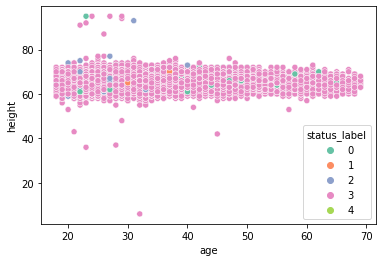

In [21]:
# 대부분이 single이라 의미없을 듯
sns.scatterplot(x = 'age', y= 'height', hue = 'status_label', data=p_female, palette='Set2')
plt.show()

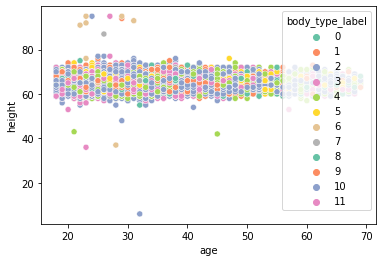

In [41]:
# 대부분이 single이라 의미없을 듯
sns.scatterplot(x = 'age', y= 'height', hue = 'body_type_label', data=p_female, palette='Set2')
plt.show()

# scikit learn - age, height

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(p_male[['age','height']])

KMeans(n_clusters=4)

In [43]:
result_by_sklearn = p_male[['age','height']].copy()
result_by_sklearn['cluster'] = kmeans.labels_
result_by_sklearn

,age,height,cluster
0,22,75.0,3
1,35,70.0,0
2,38,68.0,2
3,23,71.0,3
4,29,66.0,0
...,...,...,...
29492,32,69.0,0
29493,24,72.0,3
29494,42,71.0,2
29495,27,73.0,3


<AxesSubplot:xlabel='age', ylabel='height'>

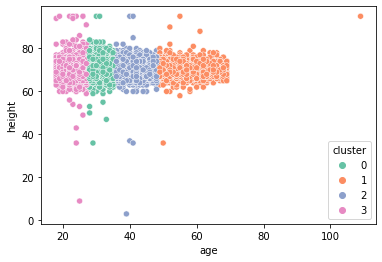

In [45]:
sns.scatterplot(x='age', y ='height', hue='cluster', data=result_by_sklearn, palette = 'Set2')

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(p_male[['age','height']])

KMeans(n_clusters=3)

In [47]:
result_by_sklearn = p_male[['age','height']].copy()
result_by_sklearn['cluster'] = kmeans.labels_
result_by_sklearn

,age,height,cluster
0,22,75.0,1
1,35,70.0,2
2,38,68.0,2
3,23,71.0,1
4,29,66.0,1
...,...,...,...
29492,32,69.0,2
29493,24,72.0,1
29494,42,71.0,2
29495,27,73.0,1


<AxesSubplot:xlabel='age', ylabel='height'>

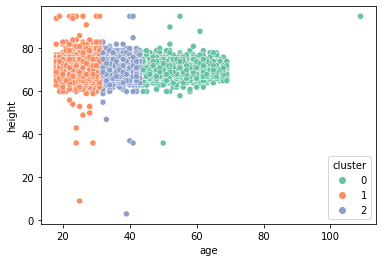

In [48]:
sns.scatterplot(x='age', y ='height', hue='cluster', data=result_by_sklearn, palette = 'Set2')

# scikit learn - height, bodytype

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(p_male[['height','body_type_label']])

KMeans(n_clusters=10)

In [72]:
result_by_sklearn = p_male[['height','body_type_label']].copy()
result_by_sklearn['cluster'] = kmeans.labels_
result_by_sklearn

,height,body_type_label,cluster
0,75.0,0,3
1,70.0,2,6
2,68.0,10,9
3,71.0,10,2
4,66.0,1,5
...,...,...,...
29492,69.0,10,2
29493,72.0,4,7
29494,71.0,2,0
29495,73.0,1,0


<AxesSubplot:xlabel='height', ylabel='body_type_label'>

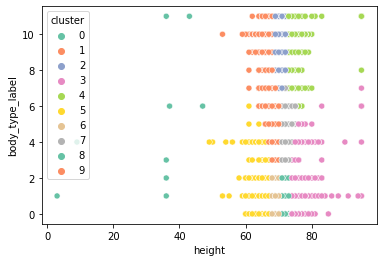

In [74]:
sns.scatterplot(x='height', y='body_type_label', hue='cluster', data=result_by_sklearn, palette = 'Set2')

# scikit learn - age, status

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(p_male[['age','status_label']])

KMeans(n_clusters=4)

In [63]:
result_by_sklearn = p_male[['age','status_label']].copy()
result_by_sklearn['cluster'] = kmeans.labels_
result_by_sklearn

,age,status_label,cluster
0,22,3,1
1,35,3,3
2,38,0,0
3,23,3,1
4,29,3,3
...,...,...,...
29492,32,3,3
29493,24,3,1
29494,42,3,0
29495,27,3,1


<AxesSubplot:xlabel='status_label', ylabel='age'>

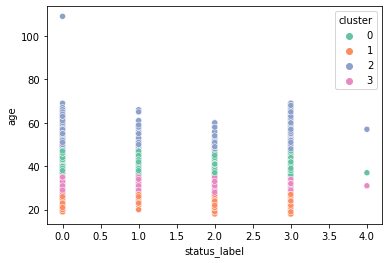

In [65]:
sns.scatterplot(y='age', x='status_label', hue='cluster', data=result_by_sklearn, palette = 'Set2')